In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import optuna
import yfinance as yf
from datetime import datetime, timedelta

from Classification_strategies import PeakValleyStrategy, plot_price_signals

# DEFINING SIGNALS

In [2]:
## Evaluating with X Years data
years=5
# Get today's date
end_date = datetime.today().date()
# Set the start date to one year ago
start_date = end_date - timedelta(days=365*years)


# Select Stock
ticker = 'AAPL'
# ticker = 'NVDA'


# Download the data for the ticker
df = yf.download(ticker, start=start_date, end=end_date)[['Close']]

[*********************100%***********************]  1 of 1 completed


## PEAKS/VALLEYS

No penalty for number of trades

[I 2024-09-28 18:46:30,662] A new study created in memory with name: no-name-76e04707-d5df-4789-bd41-1ba7cbbad659
[I 2024-09-28 18:46:30,673] Trial 0 finished with value: -10.294176645621556 and parameters: {'distance': 6, 'prominence': 4.740116758692589}. Best is trial 0 with value: -10.294176645621556.
[I 2024-09-28 18:46:30,678] Trial 1 finished with value: -7.861449359114281 and parameters: {'distance': 8, 'prominence': 1.4837396354388523}. Best is trial 0 with value: -10.294176645621556.
[I 2024-09-28 18:46:30,684] Trial 2 finished with value: -12.378327329346108 and parameters: {'distance': 3, 'prominence': 3.462488217663588}. Best is trial 2 with value: -12.378327329346108.
[I 2024-09-28 18:46:30,689] Trial 3 finished with value: -14.98004025619992 and parameters: {'distance': 2, 'prominence': 2.0229680856786505}. Best is trial 3 with value: -14.98004025619992.
[I 2024-09-28 18:46:30,694] Trial 4 finished with value: -9.603574329904085 and parameters: {'distance': 7, 'prominence

Optimized distance: 2
Optimized prominence: 0.10


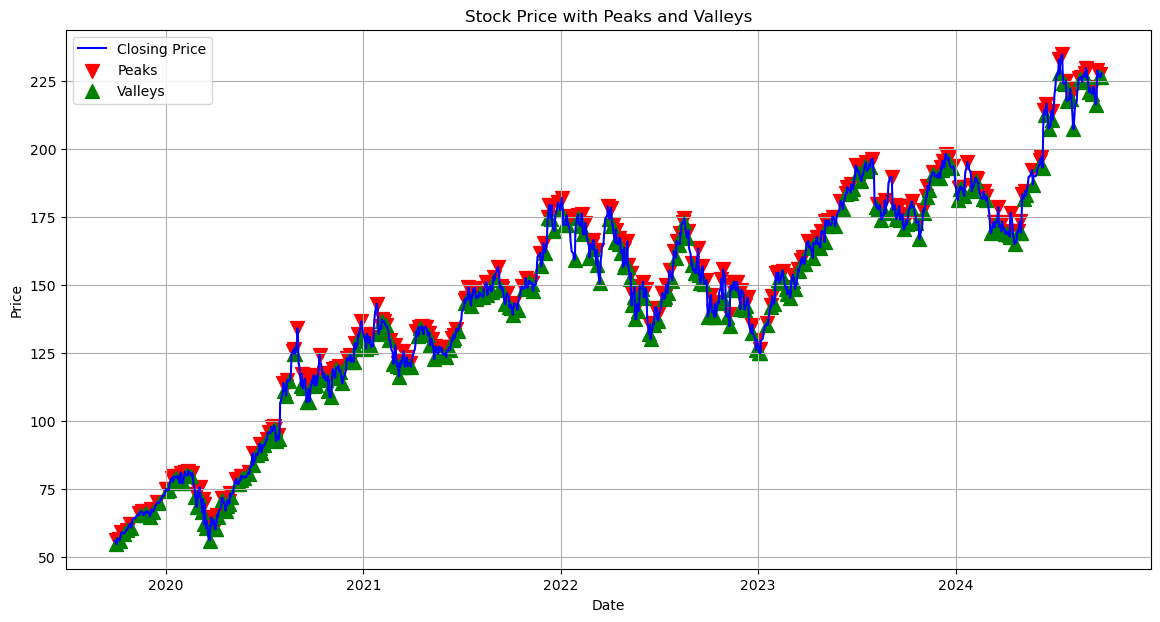

Total number of trades: 1219.0
Approx nr Trades per Week: 4.845


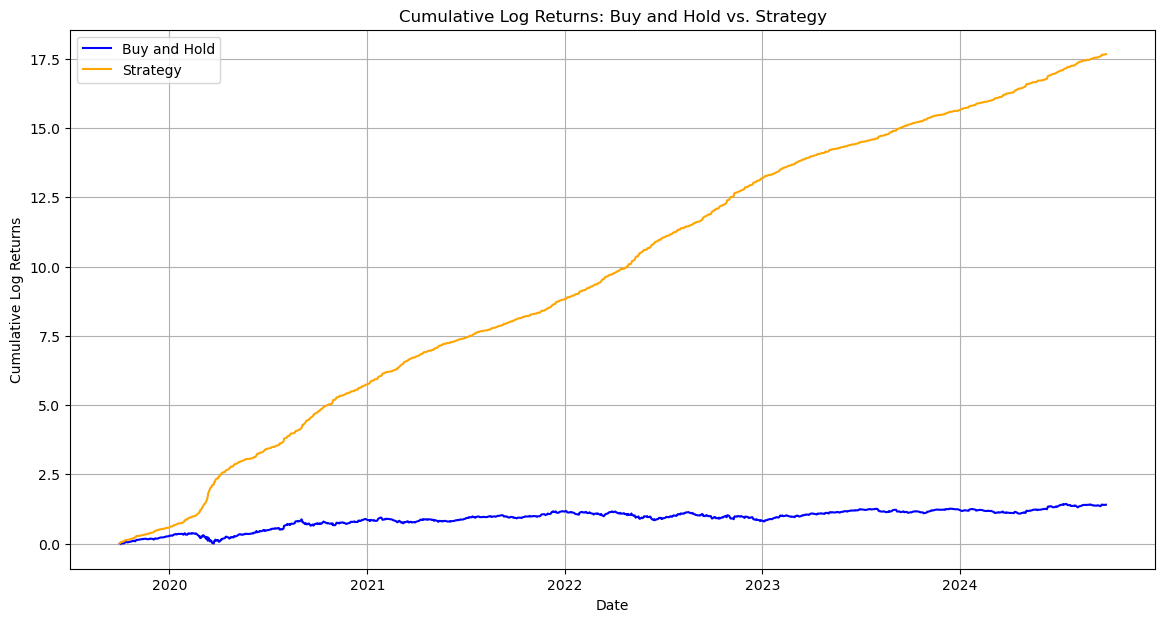

Total Buy and Hold Return: 306.82%
Total Strategy Return: 4706458197.53%
Total Number of Trades: 1219.0
Approx nr Trades per Week: 4.845


In [3]:
# Initialize the class with historical daily data
strategy = PeakValleyStrategy(df)

strategy.optimize_parameters()
strategy.compare_strategy_returns()

With penalty for number of trades

[I 2024-09-28 18:46:32,291] A new study created in memory with name: no-name-105281fc-6361-41eb-a0fd-d9ca02a68aff
[I 2024-09-28 18:46:32,301] Trial 0 finished with value: 4.63228866261813 and parameters: {'distance': 6, 'prominence': 4.740116758692589, 'trade_off': 0.0765459759396907}. Best is trial 0 with value: 4.63228866261813.
[I 2024-09-28 18:46:32,312] Trial 1 finished with value: 28.08607752686325 and parameters: {'distance': 3, 'prominence': 1.1831222799820977, 'trade_off': 0.06862220852374669}. Best is trial 0 with value: 4.63228866261813.
[I 2024-09-28 18:46:32,332] Trial 2 finished with value: 18.209370791275937 and parameters: {'distance': 2, 'prominence': 2.0229680856786505, 'trade_off': 0.061805234725280926}. Best is trial 0 with value: 4.63228866261813.
[I 2024-09-28 18:46:32,346] Trial 3 finished with value: 40.15959535218767 and parameters: {'distance': 5, 'prominence': 0.11207791788434224, 'trade_off': 0.08840321823721048}. Best is trial 0 with value: 4.63228866261813

Optimized distance: 2
Optimized prominence: 1.42


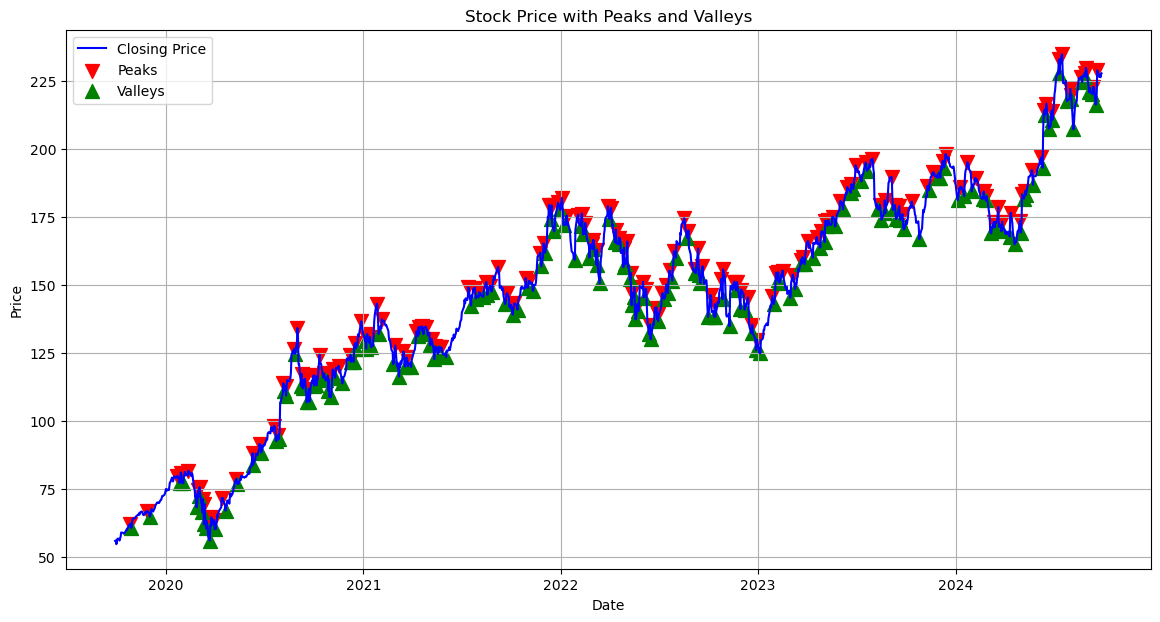

Total number of trades: 673.0
Approx nr Trades per Week: 2.675


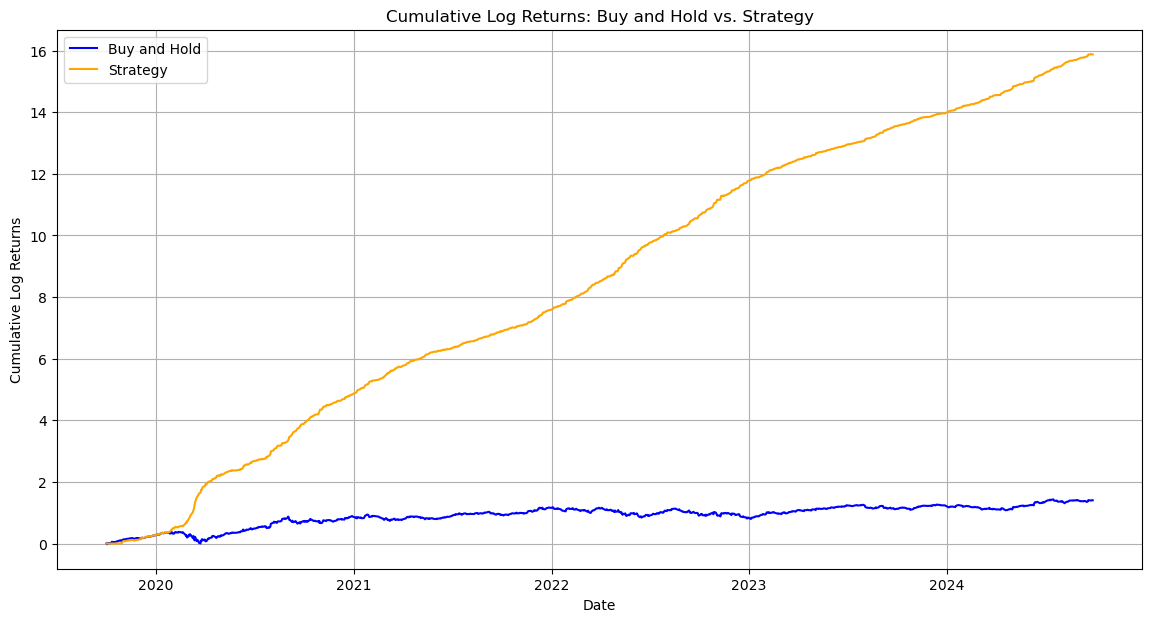

Total Buy and Hold Return: 306.82%
Total Strategy Return: 783179666.81%
Total Number of Trades: 673.0
Approx nr Trades per Week: 2.675


In [4]:
strategy.optimize_parameters(penalty=True, trade_off_max=0.1)
strategy.compare_strategy_returns()

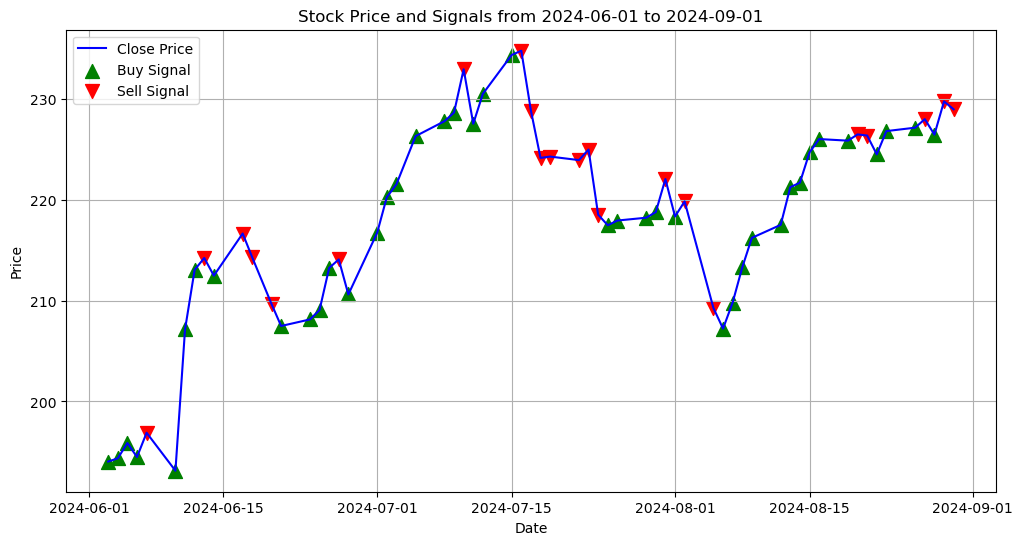

                 Close  Signal  Log_Returns  Peak  Valley  train_target
Date                                                                   
2019-09-30   55.992500     0.0          NaN   NaN     NaN             0
2019-10-01   56.147499     0.0     0.002764   NaN     NaN             0
2019-10-02   54.740002     0.0    -0.025387   NaN     NaN             0
2019-10-03   55.205002     0.0     0.008459   NaN     NaN             0
2019-10-04   56.752499     0.0     0.027646   NaN     NaN             0
...                ...     ...          ...   ...     ...           ...
2024-09-23  226.470001    -1.0    -0.007610   NaN     NaN             0
2024-09-24  227.369995    -1.0     0.003966   NaN     NaN             0
2024-09-25  226.369995    -1.0    -0.004408   NaN     NaN             0
2024-09-26  227.520004    -1.0     0.005067   NaN     NaN             0
2024-09-27  227.789993    -1.0     0.001186   NaN     NaN             0

[1258 rows x 6 columns]


In [5]:
final_df = strategy.get_signal_dataframe() #with optimized parameters
plot_price_signals(final_df, '2024-06-01', '2024-09-01') #3 months
print(final_df)

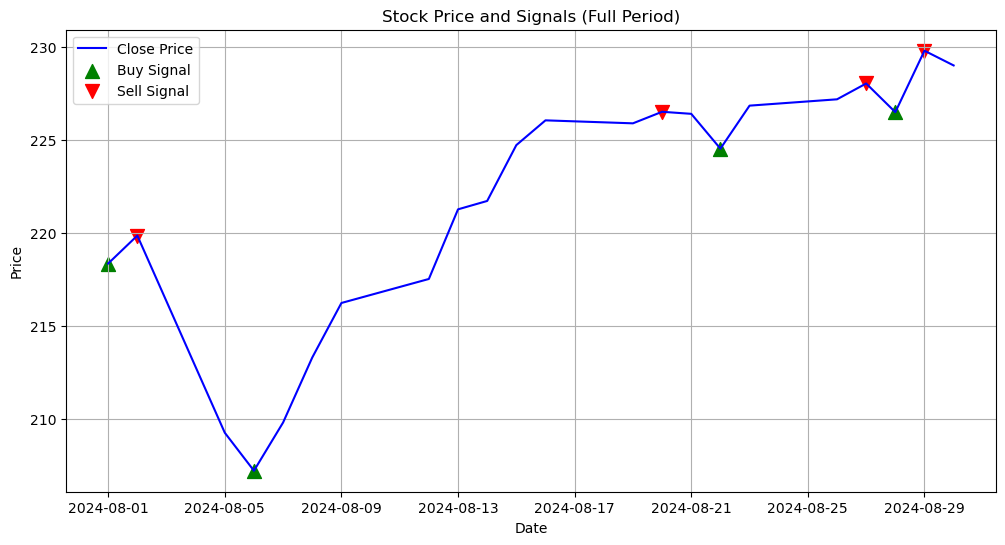

In [7]:
# Final trading signal to train ML model
month = final_df.loc['2024-08']
plot_price_signals(month, signal_col='train_target')

## CUM RETURNS FOLLOWING DAYS

Defining the strategy with a dummy df

In [13]:
# # Generate a date range for 10 days
# dates = pd.date_range(start='2023-09-01', periods=10, freq='D')

# # Generate random integers to simulate log returns
# log_returns = np.random.randint(-10, 10, size=10)

# # Create the dataframe
# dummy_df = pd.DataFrame({
#     'Date': dates,
#     'Log_Returns': log_returns
# })

# window = 3  # Define the window for the number of days
# threshold = 5  # Define the threshold

# # Calculate the sum of the next 'window' days' returns
# dummy_df['Log_Returns_next_N_days'] = sum(
#     dummy_df['Log_Returns'].shift(-i) for i in range(1, window + 1)
# )

# # Create the signal column based on the threshold
# dummy_df['Signal'] = dummy_df['Log_Returns_next_N_days'].apply(
#     lambda x: 1 if x > threshold else (-1 if x < -threshold else 0)
# )

# dummy_df